In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, rfft, rfftfreq, ifft
%matplotlib notebook

# Fourier transform - simple example
The following the simple example of the Fourier Transform. In this example, the wave of the known frequency is generate. Later, the generated wave will be [fourier transformed] to obtain the [frequency] of the wave. It is shown in 2 parts such that the first part is using the build-in library to do all the calculation; the second part is calculated based on the [fourier transform equation]: 

The equations for this example are: 

[1] $f(t) = \cos{\omega t}$, $\omega = 2\pi f$, $f\equiv$ frequency

[2] $f(t) = \cos{\omega_1 t}- 2 \sin{\omega_2 t}$, $\omega_n = 2\pi f_n$, $f \equiv$ n<sup>th</sup> frequency

# First equation 
$f(t) = \cos{2 \pi f t}$ such that $f = 400$

In [2]:
#defining the cos function 
def fcos(freq, sample_rate, time):
    x = np.linspace(0, time, sample_rate*time, endpoint=False)
    f = x*freq
    ft = np.cos(2*np.pi*f)
    return x, ft

<IPython.core.display.Javascript object>


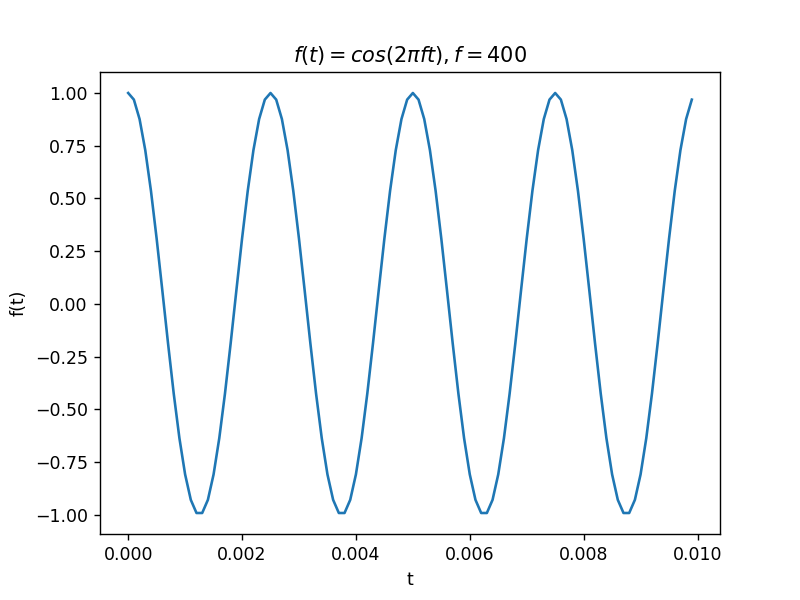

In [3]:
srate = 10000
time = 5
frequency = 400

t, ft = fcos(frequency, srate, time)
plt.figure()
plt.plot(t[:100], ft[:100])
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('$f(t) = cos(2\pi f t), f=400$')
plt.show()

Using the build-in library [scipy.fft] to compute the fourier transform. 

<IPython.core.display.Javascript object>


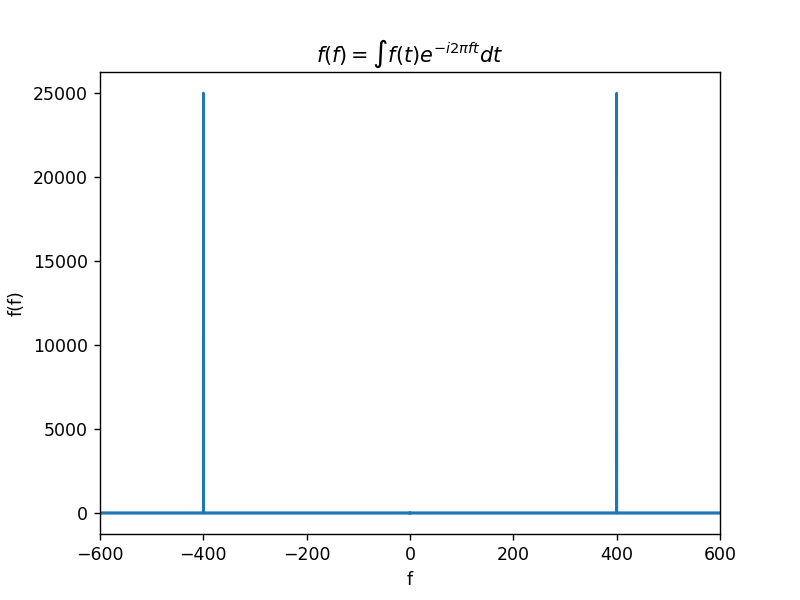

CPU times: total: 31.2 ms
Wall time: 21.5 ms


In [4]:
%%time
fy = fft(ft)
fx = fftfreq(time*srate, 1/srate)

plt.figure()
plt.plot(fx, np.abs(fy))
plt.xlabel('f')
plt.ylabel('f(f)')
plt.title('$f(f) = \int f(t) e^{-i 2 \pi f t} dt$')
plt.xlim(-600, 600)
plt.show()

Using the build-in library [scipy.fft] to compute the inverse fourier transform. 

<IPython.core.display.Javascript object>


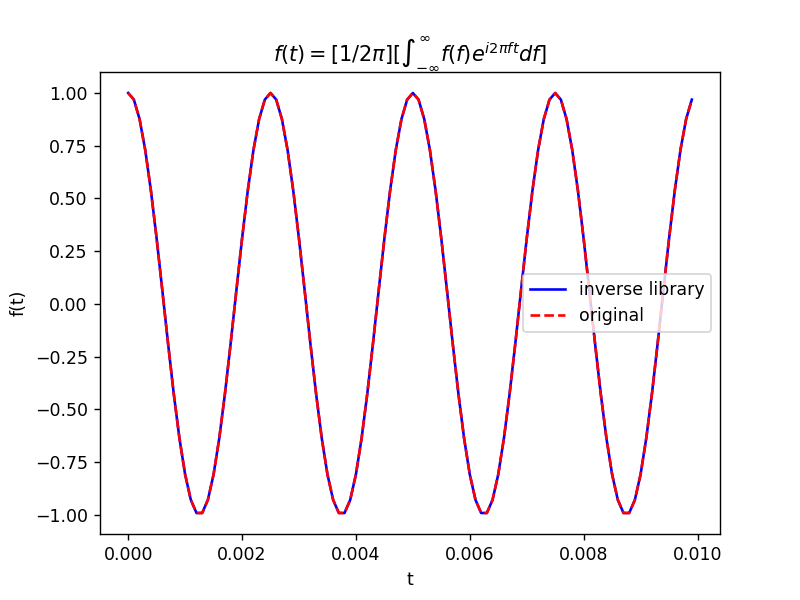

CPU times: total: 31.2 ms
Wall time: 30.5 ms


In [5]:
%%time
newy = ifft(fy)

plt.figure()
plt.plot(t[:100], np.real(newy[:100]), 'b-', label='inverse library')
plt.plot(t[:100], ft[:100], 'r--', label='original')
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('$f(t) = [1/{2\pi}] [\int^{\infty}_{-\infty} f(f) e^{i 2 \pi f t} df]$')
plt.show()

Compute the fourier transform by using the equation: 

$f(f) = \int^{\infty}_{-\infty} f(t) e^{-i 2 \pi f t} dt$

Discrete version: $f(f) = \sum^{\infty}_{n=-\infty} f(t) e^{-i 2 \pi f t} \Delta t$

In [6]:
%%time
tdelta = t[1]-t[0]

ansff=[]
ansfreq=[]
for i in range(int(-srate/2), int(srate/2), 1):
    ff = np.sum(ft*np.exp(-2j*np.pi*t*i)*tdelta)
    ansff.append(ff)
    ansfreq.append(i)

CPU times: total: 22.9 s
Wall time: 23 s


In [7]:
ansff = np.array(ansff)
ansfreq = np.array(ansfreq)

<IPython.core.display.Javascript object>


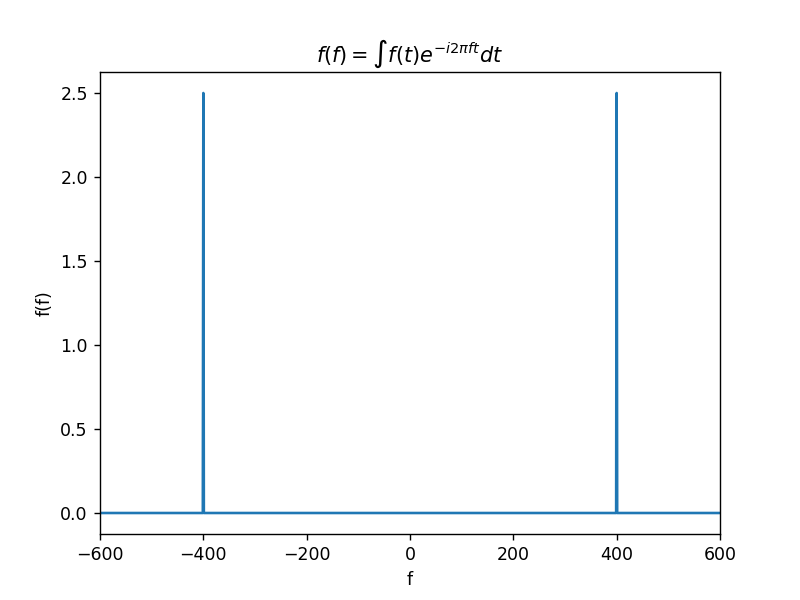

In [8]:
plt.figure()
plt.plot(ansfreq, np.abs(ansff))
plt.xlabel('f')
plt.ylabel('f(f)')
plt.title('$f(f) = \int f(t) e^{-i 2 \pi f t} dt$')
plt.xlim(-600, 600)
plt.show()

Compute the inverse fourier transform by using the equation: 

$f(t) = \frac{1}{2\pi} \int^{\infty}_{-\infty} f(f) e^{i 2 \pi f t} df$

Discrete version: $f(t) = \frac{1}{2\pi} \sum^{\infty}_{n=-\infty} f(f) e^{i 2 \pi f t} \Delta f$

In [9]:
%%time
fdelta = ansfreq[1]-ansfreq[0]

ansft=[]
anstime=[]
for j in t: 
    f = np.sum(ansff*np.exp(2j*np.pi*j*ansfreq)*fdelta)
    ansft.append(f)
    anstime.append(j)

CPU times: total: 23.6 s
Wall time: 23.8 s


In [10]:
ansft=np.array(ansft)/(2*np.pi)
anstime=np.array(anstime)

<IPython.core.display.Javascript object>


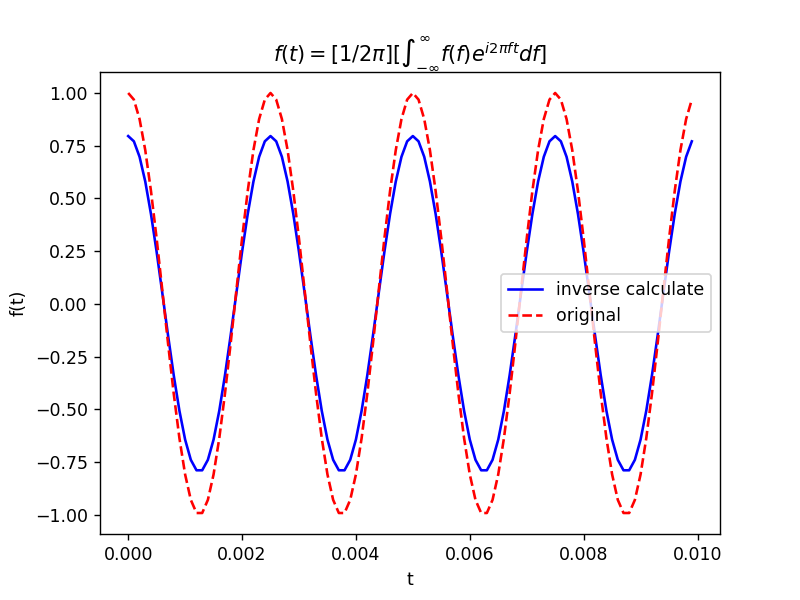

In [11]:
plt.figure()
plt.plot(anstime[:100], np.real(ansft[:100]), 'b', label='inverse calculate')
plt.plot(t[:100], ft[:100], 'r--', label='original')
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('$f(t) = [1/{2\pi}] [\int^{\infty}_{-\infty} f(f) e^{i 2 \pi f t} df]$')
plt.show()

Plotting the summary

<IPython.core.display.Javascript object>


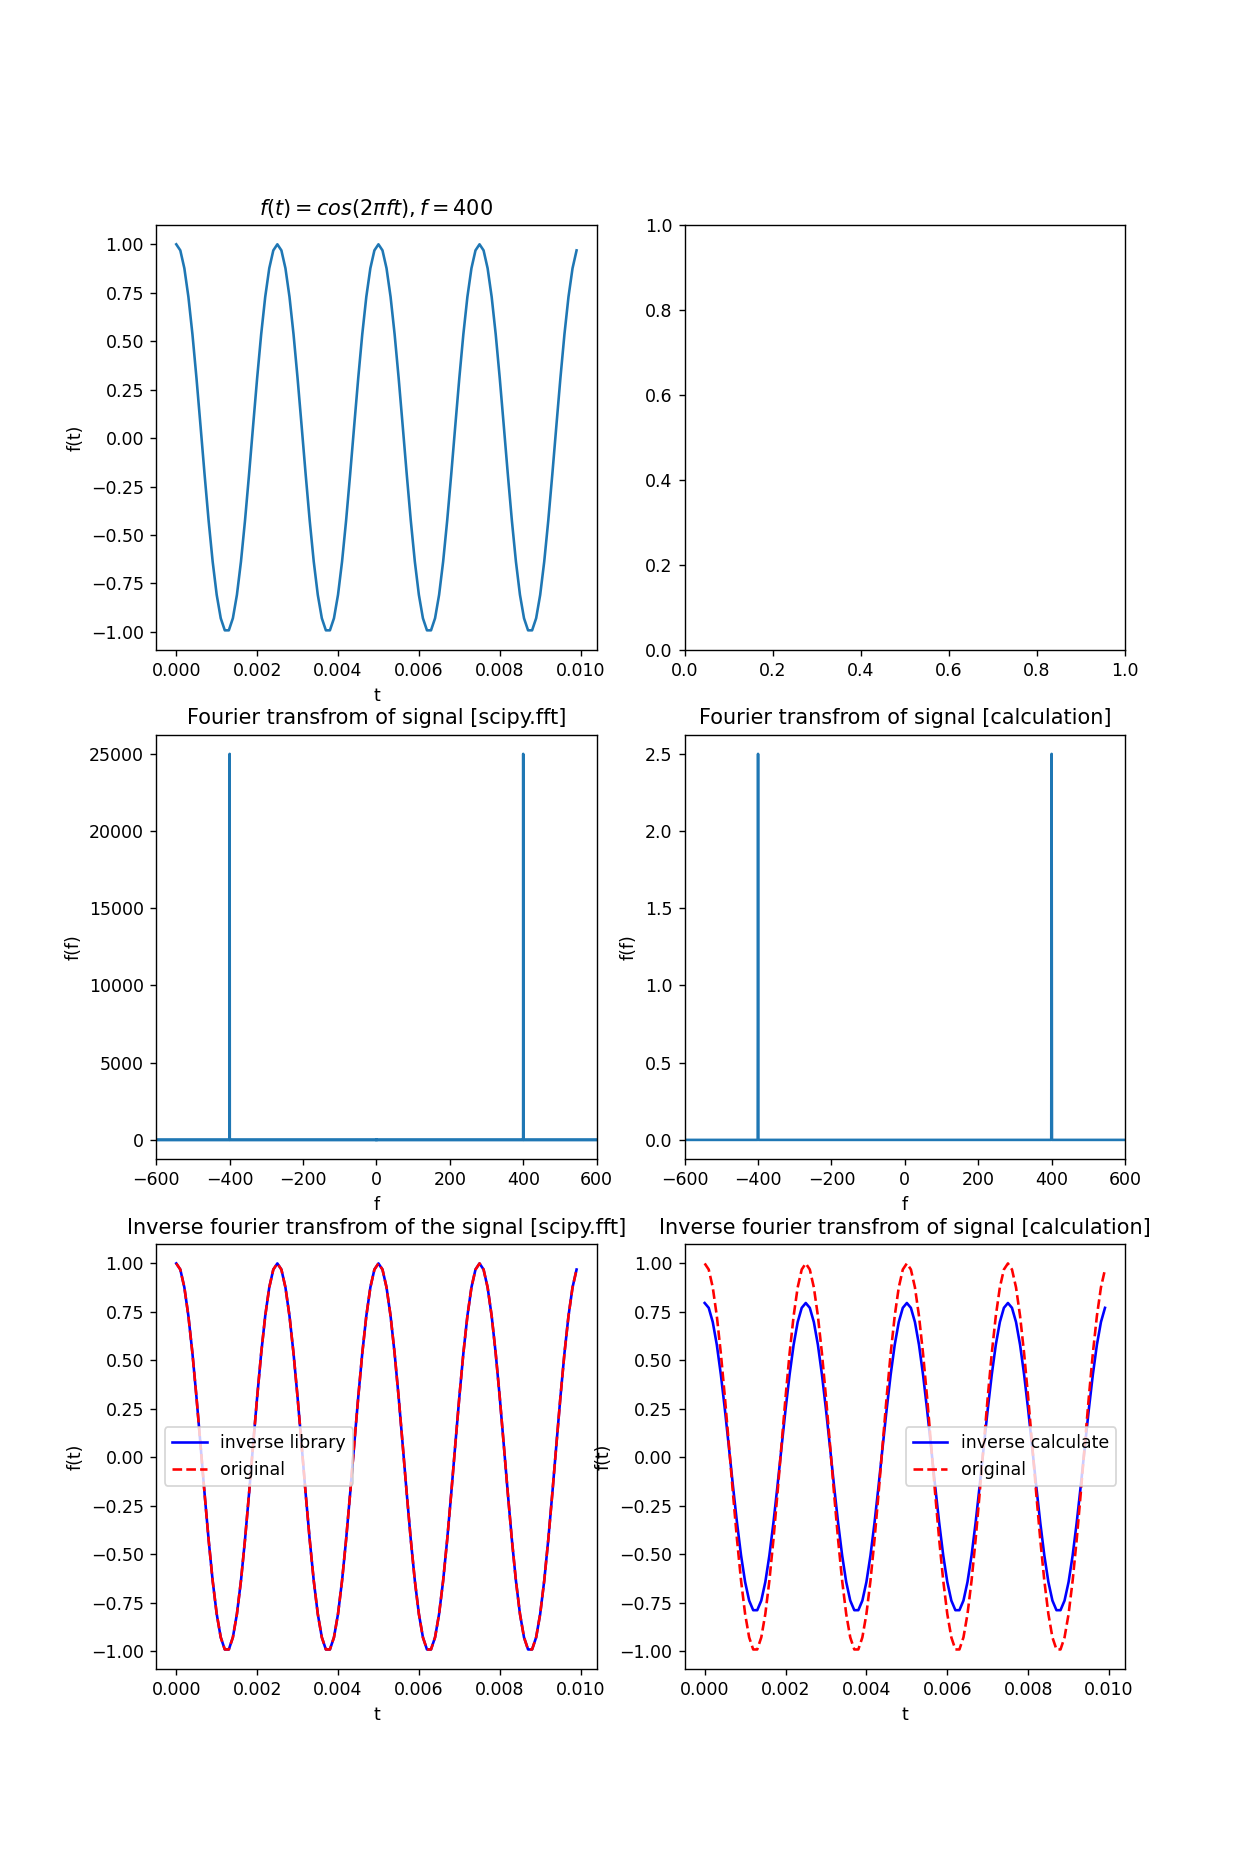

In [12]:
fig, ax = plt.subplots(3, 2, figsize=(10,15))
ax[0][0].plot(t[:100], ft[:100])
ax[0][0].set_title('$f(t) = cos(2\pi f t), f=400$')
ax[0][0].set_xlabel('t')
ax[0][0].set_ylabel('f(t)')

ax[1][0].plot(fx, np.abs(fy))
ax[1][0].set_title('Fourier transfrom of signal [scipy.fft]')
ax[1][0].set_xlabel('f')
ax[1][0].set_ylabel('f(f)')
ax[1][0].set_xlim(-600, 600)

ax[2][0].plot(t[:100], np.real(newy[:100]), 'b-', label='inverse library')
ax[2][0].plot(t[:100], ft[:100], 'r--', label='original')
ax[2][0].set_title('Inverse fourier transfrom of the signal [scipy.fft]')
ax[2][0].legend(loc='best')
ax[2][0].set_xlabel('t')
ax[2][0].set_ylabel('f(t)')

ax[1][1].plot(ansfreq, np.abs(ansff))
ax[1][1].set_title('Fourier transfrom of signal [calculation]')
ax[1][1].set_xlabel('f')
ax[1][1].set_ylabel('f(f)')
ax[1][1].set_xlim(-600, 600)

ax[2][1].plot(anstime[:100], np.real(ansft[:100]), 'b', label='inverse calculate')
ax[2][1].plot(t[:100], ft[:100], 'r--', label='original')
ax[2][1].set_title('Inverse fourier transfrom of signal [calculation]')
ax[2][1].legend(loc='best')
ax[2][1].set_xlabel('t')
ax[2][1].set_ylabel('f(t)')

plt.show()

# Summary of the plot
The plots from the above show that the fourier transform able to display the frequency of the signal. In this case, the signal is $\cos{(2\pi f t)}$, $f=400$. From the fourier transform $f=400$ is identified. The inverse fourier transform able to obtain the original signal with the known frequency. 

Two methods are used in this case example: library module (scipy.fft) and calculation via formula ($f(f) = \int^{\infty}_{-\infty} f(t) e^{-i 2 \pi f t} dt$ and $f(t) = \int^{\infty}_{-\infty} f(f) e^{i 2 \pi f t} df$). From this example, the [scipy.fft] runs faster than [formula calculation]. Besides, the [formula calculation] shows some discrepency when reversing from frequency domain to time domain. 

Therefore, it is encourage to use [scipy.fft] when computing the fourier transform and inverse fourier transform. 

# Second equation 
$f(t) = \cos{2\pi f_1 t}- 2 \sin{2\pi f_2 t}$, $f_1 = 400$ and $f_2 = 800$

In [13]:
def newfun(freq1, freq2, time, sample_rate):
    t = np.linspace(0, time, time*sample_rate, endpoint=False)
    f1 = freq1*t
    f2 = freq2*t
    fy = np.cos(2*np.pi*f1) - 2*np.sin(2*np.pi*f2)
    return t, fy

In [14]:
srate = 10_000
time = 5
freq1 = 400
freq2 = 2*freq1
x, y = newfun(freq1, freq2, time, srate)

<IPython.core.display.Javascript object>


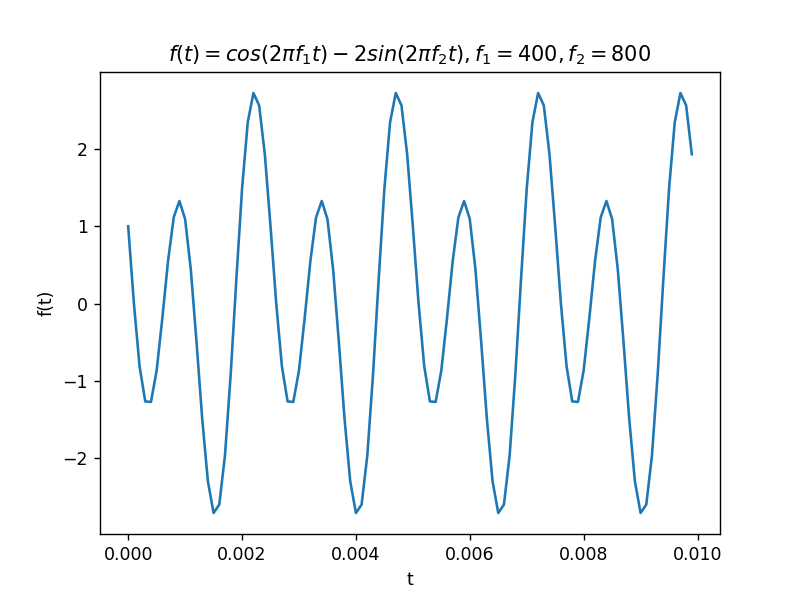

In [15]:
plt.figure()
plt.plot(x[:100], y[:100])
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('$f(t) = cos(2\pi f_1 t) - 2 sin(2 \pi f_2 t), f_1=400, f_2=800$')
plt.show()

Using the build-in library [scipy.fft] to compute the fourier transform. 

In [16]:
%%time
fy = fft(y)
fx = fftfreq(time*srate, 1/srate)

CPU times: total: 0 ns
Wall time: 999 µs


<IPython.core.display.Javascript object>


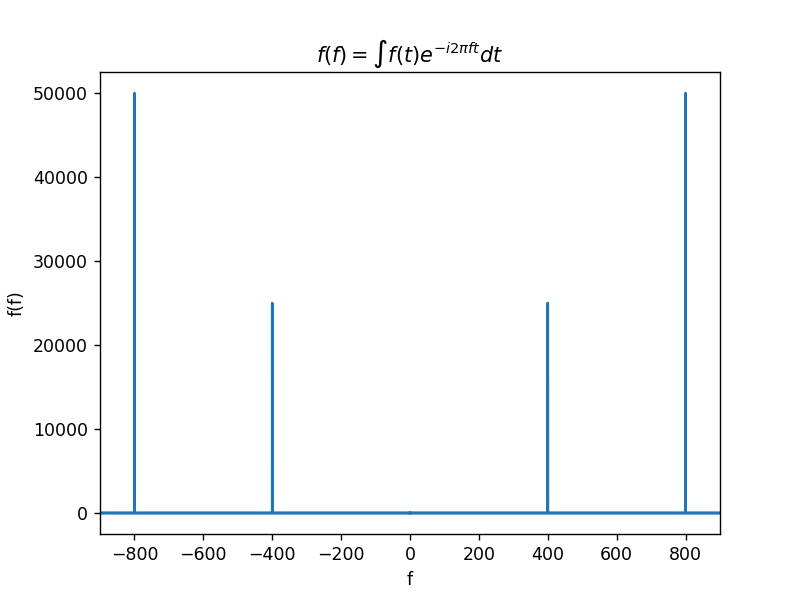

In [17]:
plt.figure()
plt.plot(fx, np.abs(fy))
plt.xlabel('f')
plt.ylabel('f(f)')
plt.title('$f(f) = \int f(t) e^{-i 2 \pi f t} dt$')
plt.xlim(-900, 900)
plt.show()

Using the build-in library [scipy.fft] to compute the inverse fourier transform. 

<IPython.core.display.Javascript object>


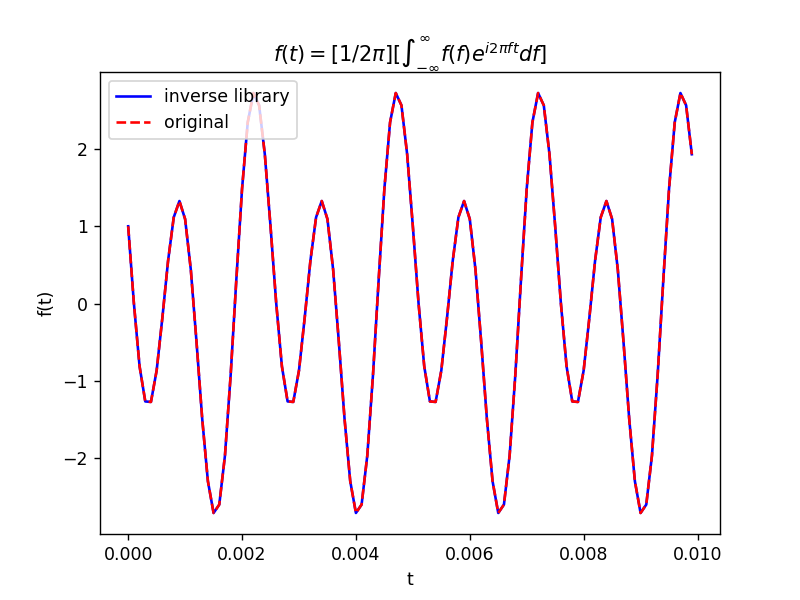

CPU times: total: 15.6 ms
Wall time: 29.9 ms


In [18]:
%%time
ny = ifft(fy)

plt.figure()
plt.plot(x[:100], np.real(ny[:100]), 'b', label='inverse library')
plt.plot(x[:100], y[:100], 'r--', label='original')
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('$f(t) = [1/{2\pi}] [\int^{\infty}_{-\infty} f(f) e^{i 2 \pi f t} df]$')
plt.show()

Compute the fourier transform by using the equation: 

$f(f) = \int^{\infty}_{-\infty} f(t) e^{-i 2 \pi f t} dt$

Discrete version: $f(f) = \sum^{\infty}_{n=-\infty} f(t) e^{-i 2 \pi f t} \Delta t$

In [19]:
%%time
tdelta = x[1]-x[0]
ansfun=[]
ansfreq=[]
for i in range(int(-srate/2), int(srate/2), 1):
    fun = np.sum(y*np.exp(-2j*np.pi*i*x)*tdelta)
    ansfun.append(fun)
    ansfreq.append(i)

CPU times: total: 25.8 s
Wall time: 26.1 s


In [20]:
ansfun=np.array(ansfun)
ansfreq=np.array(ansfreq)

<IPython.core.display.Javascript object>


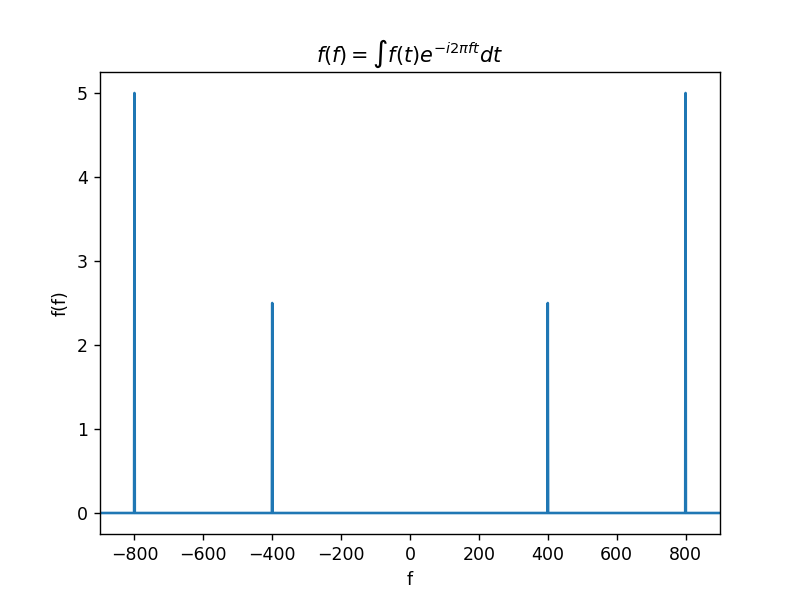

In [21]:
plt.figure()
plt.plot(ansfreq, np.abs(ansfun))
plt.xlabel('f')
plt.ylabel('f(f)')
plt.title('$f(f) = \int f(t) e^{-i 2 \pi f t} dt$')
plt.xlim(-900, 900)

plt.show()

Compute the inverse fourier transform by using the equation: 

$f(t) = \frac{1}{2\pi} \int^{\infty}_{-\infty} f(f) e^{i 2 \pi f t} df$

Discrete version: $f(t) = \frac{1}{2\pi} \sum^{\infty}_{n=-\infty} f(f) e^{i 2 \pi f t} \Delta f$

In [22]:
%%time
fdelta = ansfreq[1]-ansfreq[0]
ansnft=[]
ansntt=[]
for j in x: 
    nft = np.sum(ansfun*np.exp(2j*np.pi*j*ansfreq)*fdelta)
    ansnft.append(nft)
    ansntt.append(j)

CPU times: total: 22.8 s
Wall time: 23 s


In [23]:
ansnft=np.array(ansnft)/(2*np.pi)
ansntt=np.array(ansntt)

<IPython.core.display.Javascript object>


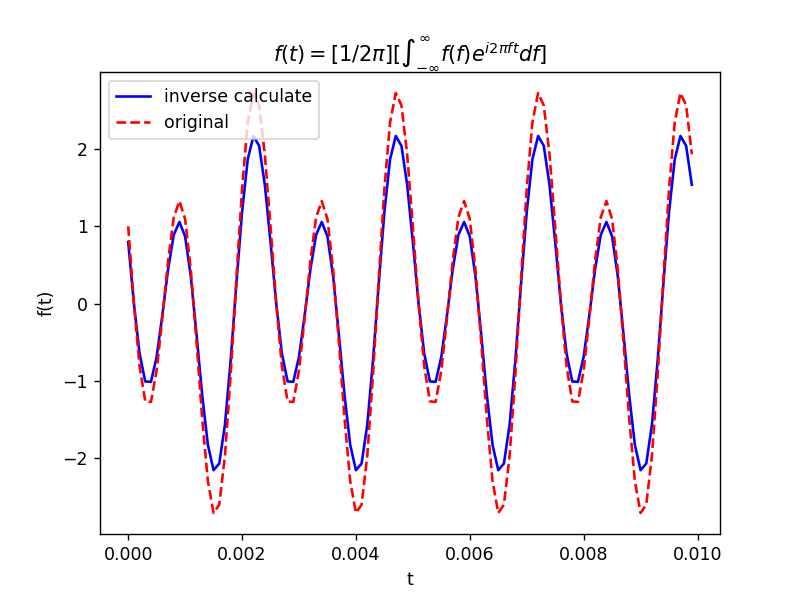

In [24]:
plt.figure()
plt.plot(ansntt[:100], np.real(ansnft[:100]), 'b', label='inverse calculate')
plt.plot(x[:100], y[:100], 'r--', label='original')
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('$f(t) = [1/{2\pi}] [\int^{\infty}_{-\infty} f(f) e^{i 2 \pi f t} df]$')
plt.show()

Plotting the summary

<IPython.core.display.Javascript object>


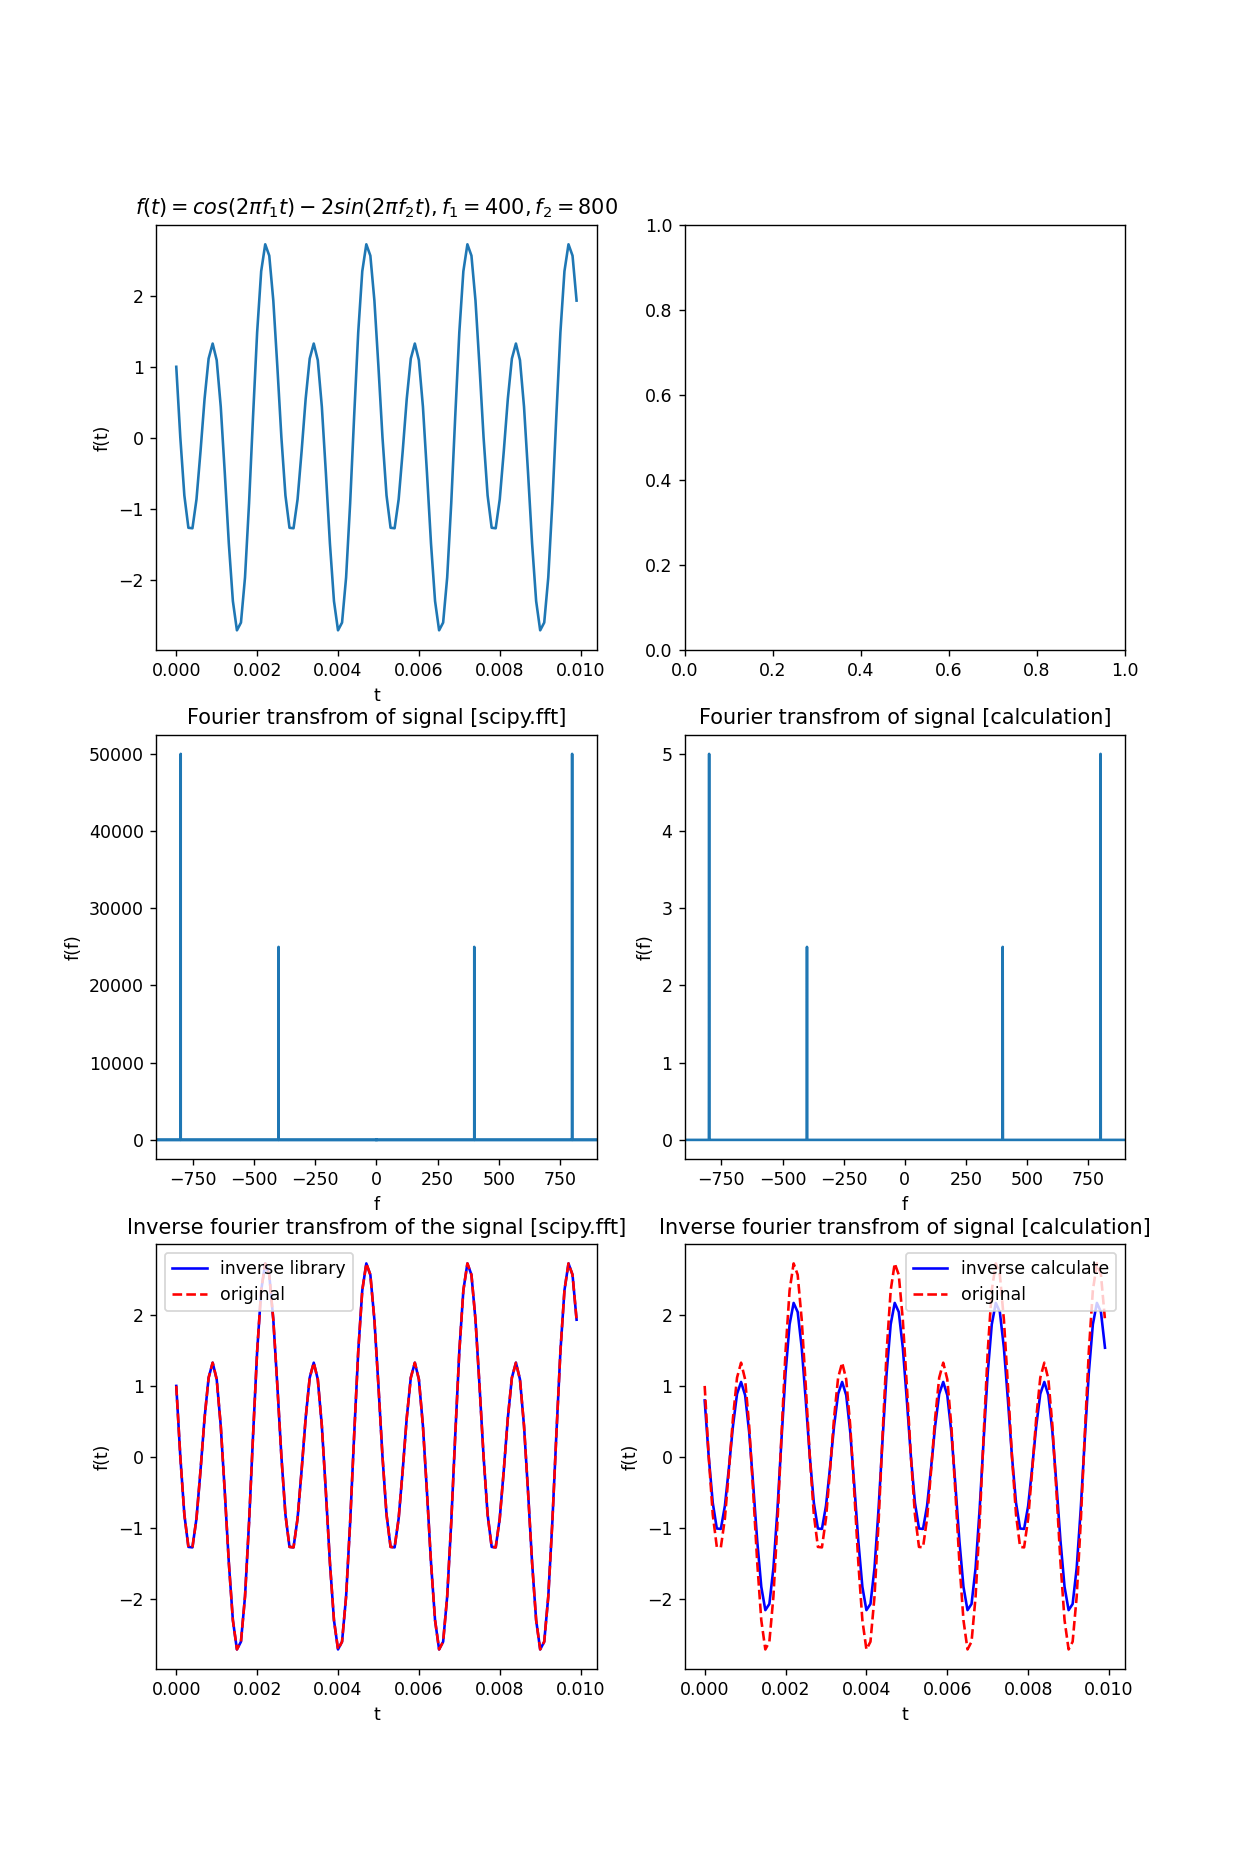

In [25]:
fig, ax = plt.subplots(3, 2, figsize=(10,15))
ax[0][0].plot(x[:100], y[:100])
ax[0][0].set_title('$f(t) = cos(2\pi f_1 t) - 2 sin(2 \pi f_2 t), f_1=400, f_2=800$')
ax[0][0].set_xlabel('t')
ax[0][0].set_ylabel('f(t)')

ax[1][0].plot(fx, np.abs(fy))
ax[1][0].set_title('Fourier transfrom of signal [scipy.fft]')
ax[1][0].set_xlabel('f')
ax[1][0].set_ylabel('f(f)')
ax[1][0].set_xlim(-900, 900)

ax[2][0].plot(x[:100], np.real(ny[:100]), 'b', label='inverse library')
ax[2][0].plot(x[:100], y[:100], 'r--', label='original')
ax[2][0].legend(loc='best')
ax[2][0].set_title('Inverse fourier transfrom of the signal [scipy.fft]')
ax[2][0].set_xlabel('t')
ax[2][0].set_ylabel('f(t)')

ax[1][1].plot(ansfreq, np.abs(ansfun))
ax[1][1].set_title('Fourier transfrom of signal [calculation]')
ax[1][1].set_xlabel('f')
ax[1][1].set_ylabel('f(f)')
ax[1][1].set_xlim(-900, 900)

ax[2][1].plot(ansntt[:100], np.real(ansnft[:100]), 'b', label='inverse calculate')
ax[2][1].plot(x[:100], y[:100], 'r--', label='original')
ax[2][1].legend(loc='best')
ax[2][1].set_title('Inverse fourier transfrom of signal [calculation]')
ax[2][1].set_xlabel('t')
ax[2][1].set_ylabel('f(t)')

plt.show()

# Summary of the plot 
Similar result (speed of the code and discrepency) as the above $f(t)=\cos{2\pi f t}$, $f=400$ is obtained for this second plot. 